# Cluster Analysis

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [8]:
import seaborn as sns

iris = sns.load_dataset('iris')

In [9]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [11]:
DF = iris.iloc[:, :-1].copy() # 마지막 열 제외

DF.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# K-means Clustering 
- n_clusters : 군집 개수 지정
- init : 초기 중심 설정 방식(기본값)
- max_iter : 최대 반복 횟수

In [12]:
from sklearn.cluster import KMeans
KMeans?

In [13]:
from sklearn.cluster import KMeans

kmeans_3 = KMeans(n_clusters = 3, 
                  init ='k-means++', 
                  max_iter = 15, 
                  random_state = 2045)

kmeans_3.fit(DF)

C:\Users\lg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\lg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(max_iter=15, n_clusters=3, random_state=2045)

In [14]:
kmeans_3.n_iter_  # 반복 횟수

5

In [15]:
kmeans_3.cluster_centers_ # 군집별 중심점

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [16]:
kmeans_3.labels_  # 군집결과 레이블

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [17]:
kmeans_3.inertia_  # 군집 중심까지의 제곱 거리 합

78.851441426146

# Scree Plot

In [18]:
inertia = []

K = range(1,10) # 1 ~ 9 군집 분석

for k in K:
    kmeanModel = KMeans(n_clusters = k)
    kmeanModel.fit(DF)
    inertia.append(kmeanModel.inertia_)

C:\Users\lg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\lg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\lg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\lg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks

## 군집 중심까지의 제곱 거리의 합

In [19]:
inertia

[681.3706,
 152.3479517603579,
 78.851441426146,
 57.22847321428572,
 46.446182051282065,
 39.058459040959036,
 34.30581529581531,
 30.246148332060102,
 28.208172587216705]

## Plot the elbow

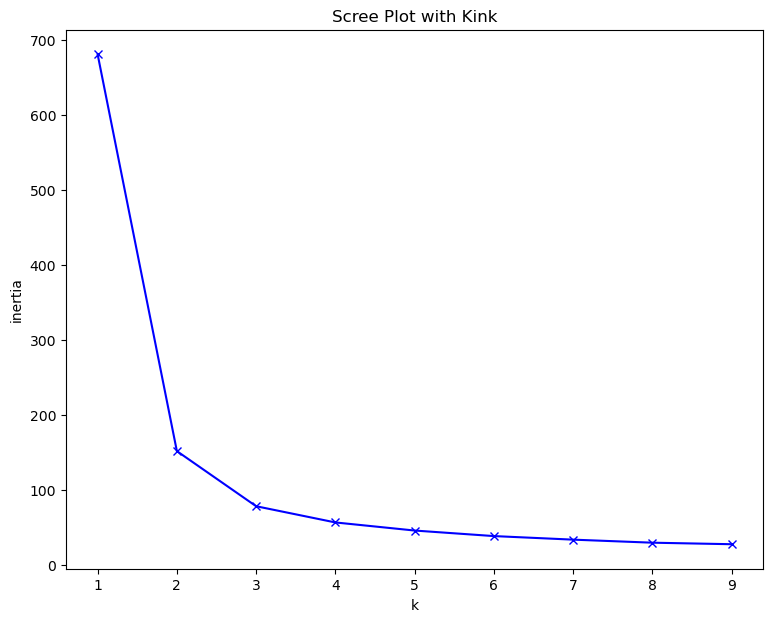

In [20]:
plt.figure(figsize = (9, 7))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('Scree Plot with Kink')
plt.show() # 완만해지는 지점의 점을 사용

# 4. visualization with PCA(Principal Component Analysis)

## 1) target 및 cluster 추가

In [23]:
DF['cluster'] = kmeans_3.labels_
DF['target'] = iris.species 

In [24]:
DF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,cluster,target
0,5.1,3.5,1.4,0.2,1,setosa
1,4.9,3.0,1.4,0.2,1,setosa
2,4.7,3.2,1.3,0.2,1,setosa


## 2) 군집 결과 확인

In [26]:
DF.groupby('target')['cluster'].value_counts()

target      cluster
setosa      1          50
versicolor  0          48
            2           2
virginica   2          36
            0          14
Name: count, dtype: int64

## 3) PCA 차원 축소(4차원 -> 2차원)

In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca_transformed = pca.fit_transform(iris.iloc[:, :-1])
print(pca.explained_variance_ratio_) # 설명력
pca_transformed[:5]

[0.92461872 0.05306648]


array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451]])

## 4) pca_x와 pca_y 추가

In [30]:
DF['pca_x'] = pca_transformed[:, 0]
DF['pca_y'] = pca_transformed[:, 1]

In [31]:
DF.head(5)

,sepal_length,sepal_width,petal_length,petal_width,cluster,target,pca_x,pca_y
0,5.1,3.5,1.4,0.2,1,setosa,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,1,setosa,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,1,setosa,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,1,setosa,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,1,setosa,-2.728717,0.326755


## 5) 2차원 시각화 
- 군집값 인덱스 추출

In [33]:
idx_0 = DF[DF['cluster'] == 0].index
idx_1 = DF[DF['cluster'] == 1].index
idx_2 = DF[DF['cluster'] == 2].index

In [34]:
idx_0, idx_1, idx_2

(Index([ 50,  51,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  78,  79,
         80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
         94,  95,  96,  97,  98,  99, 101, 106, 113, 114, 119, 121, 123, 126,
        127, 133, 138, 142, 146, 149],
       dtype='int64'),
 Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       dtype='int64'),
 Index([ 52,  77, 100, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 115,
        116, 117, 118, 120, 122, 124, 125, 128, 129, 130, 131, 132, 134, 135,
        136, 137, 139, 140, 141, 143, 144, 145, 147, 148],
       dtype='int64'))

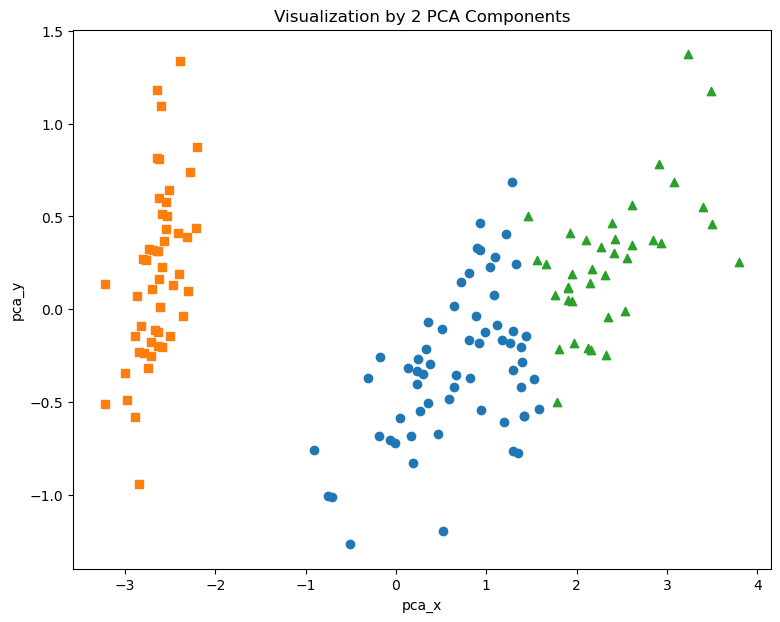

In [35]:
plt.figure(figsize = (9, 7))
plt.scatter(x = DF.loc[idx_0, 'pca_x'], 
            y = DF.loc[idx_0, 'pca_y'], 
            marker = 'o')
plt.scatter(x = DF.loc[idx_1, 'pca_x'], 
            y = DF.loc[idx_1, 'pca_y'], 
            marker = 's')
plt.scatter(x = DF.loc[idx_2, 'pca_x'], 
            y = DF.loc[idx_2, 'pca_y'], 
            marker = '^')

plt.xlabel('pca_x')
plt.ylabel('pca_y')
plt.title('Visualization by 2 PCA Components')
plt.show()

# 5. Silhouette Analysis

## 1) DF에 'Clustering' 추가

In [38]:
DF['Clustering'] = kmeans_3.labels_

In [39]:
DF

,sepal_length,sepal_width,petal_length,petal_width,cluster,target,pca_x,pca_y,Clustering
0,5.1,3.5,1.4,0.2,1,setosa,-2.684126,0.319397,1
1,4.9,3.0,1.4,0.2,1,setosa,-2.714142,-0.177001,1
2,4.7,3.2,1.3,0.2,1,setosa,-2.888991,-0.144949,1
3,4.6,3.1,1.5,0.2,1,setosa,-2.745343,-0.318299,1
4,5.0,3.6,1.4,0.2,1,setosa,-2.728717,0.326755,1
...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica,1.944110,0.187532,2
146,6.3,2.5,5.0,1.9,0,virginica,1.527167,-0.375317,0
147,6.5,3.0,5.2,2.0,2,virginica,1.764346,0.078859,2
148,6.2,3.4,5.4,2.3,2,virginica,1.900942,0.116628,2


## 2) 실수엣 계수값

In [41]:
from sklearn.metrics import silhouette_samples

silhouette_samples(iris.iloc[:, :-1], DF['Clustering'])

array([0.85295506, 0.81549476, 0.8293151 , 0.80501395, 0.8493016 ,
       0.74828037, 0.82165093, 0.85390505, 0.75215011, 0.825294  ,
       0.80310303, 0.83591262, 0.81056389, 0.74615046, 0.70259371,
       0.64377156, 0.77568391, 0.85101831, 0.70685782, 0.82030124,
       0.78418399, 0.82590584, 0.79297218, 0.7941134 , 0.77503635,
       0.79865509, 0.83346695, 0.84201773, 0.84364429, 0.81784646,
       0.81518962, 0.79899235, 0.76272528, 0.72224615, 0.82877171,
       0.83224831, 0.79415322, 0.84188954, 0.76856774, 0.85033231,
       0.84941579, 0.63900017, 0.78657771, 0.80023815, 0.74698726,
       0.80977534, 0.81340268, 0.81902059, 0.8182324 , 0.85209835,
       0.02672203, 0.38118643, 0.05340075, 0.59294381, 0.36885321,
       0.59221025, 0.28232583, 0.26525405, 0.34419223, 0.57829491,
       0.37478707, 0.58710354, 0.55107857, 0.48216686, 0.56310057,
       0.32459291, 0.55751057, 0.61072967, 0.46149897, 0.6115753 ,
       0.32909528, 0.58968904, 0.31046301, 0.49424779, 0.50004

In [42]:
DF['Silh_Coef'] = silhouette_samples(iris.iloc[:, :-1], DF['Clustering'])

In [43]:
DF

,sepal_length,sepal_width,petal_length,petal_width,cluster,target,pca_x,pca_y,Clustering,Silh_Coef
0,5.1,3.5,1.4,0.2,1,setosa,-2.684126,0.319397,1,0.852955
1,4.9,3.0,1.4,0.2,1,setosa,-2.714142,-0.177001,1,0.815495
2,4.7,3.2,1.3,0.2,1,setosa,-2.888991,-0.144949,1,0.829315
3,4.6,3.1,1.5,0.2,1,setosa,-2.745343,-0.318299,1,0.805014
4,5.0,3.6,1.4,0.2,1,setosa,-2.728717,0.326755,1,0.849302
...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica,1.944110,0.187532,2,0.425136
146,6.3,2.5,5.0,1.9,0,virginica,1.527167,-0.375317,0,0.104171
147,6.5,3.0,5.2,2.0,2,virginica,1.764346,0.078859,2,0.314930
148,6.2,3.4,5.4,2.3,2,virginica,1.900942,0.116628,2,0.352454


In [44]:
## 3) 실루엣 점수(Silhouette Score)

In [45]:
from sklearn.metrics import silhouette_score

silhouette_score(iris.iloc[:, :-1], DF['Clustering'])

0.5528190123564102

In [46]:
DF.groupby('Clustering')['Silh_Coef'].mean()

Clustering
0    0.417320
1    0.798140
2    0.451105
Name: Silh_Coef, dtype: float64

## 4) 시각화

In [48]:
pip install yellowbrick


     ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
     -------------------------------------- 282.6/282.6 kB 8.8 MB/s eta 0:00:00


In [49]:
from yellowbrick.cluster import SilhouetteVisualizer
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [50]:
visualizer_3 = SilhouetteVisualizer(kmeans_3, colors='yellowbrick')

C:\Users\lg\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


SilhouetteVisualizer(ax=<Axes: >, colors='yellowbrick',
                     estimator=KMeans(max_iter=15, n_clusters=3,
                                      random_state=2045))

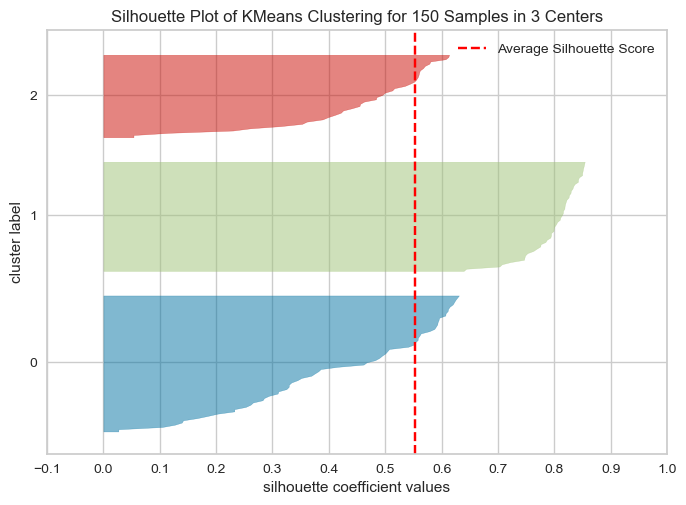

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 150 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [51]:
visualizer_3.fit(DF[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])      
visualizer_3.show()

# 6. K-Nearest Neighbors 
K최근접 이웃 알고리즘(지도학습 분류) *어떤 범주로 나누어져 있는 데이터 셋이 있을 때(지도학습), 새로운 데이터가 추가된다면 이를 어떤 범주로 분류할 것인지를 결정할 때 사용할 수 있는 분류 알고리즘. 
 
 K = 투표 과정에 참여할 최근접 이웃의 개수 파라미터

In [75]:
# !pip uninstall scikit-learn #버전 오류 문제 해결

ERROR: Invalid requirement: '#버전'


In [78]:
!pip install scikit-learn==1.3.2

^C


In [53]:
import warnings
warnings.filterwarnings('ignore')

In [54]:
from sklearn.datasets import load_breast_cancer # 유방암 데이터
breast_cancer_data = load_breast_cancer() 

In [55]:
import pandas as pd
df_data = pd.DataFrame(breast_cancer_data.data)
df_labels = pd.DataFrame(breast_cancer_data.target)

In [56]:
df_data.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [57]:
df_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [58]:
df_labels.head()

,0
0,0
1,0
2,0
3,0
4,0


In [59]:
df_labels.value_counts()

1    357
0    212
Name: count, dtype: int64

# 정규화

In [60]:
def min_max_normalize(lst):
    normalized = []
    
    for value in lst:
        normalized_num = (value - min(lst)) / (max(lst) - min(lst))
        normalized.append(normalized_num)
    
    return normalized

In [61]:
for x in range(len(df_data.columns)):
    df_data[x] = min_max_normalize(df_data[x])
df_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.338222,0.323965,0.332935,0.216920,0.394785,0.260601,0.208058,0.243137,0.379605,0.270379,...,0.296663,0.363998,0.283138,0.170906,0.404138,0.220212,0.217403,0.393836,0.263307,0.189596
std,0.166787,0.145453,0.167915,0.149274,0.126967,0.161992,0.186785,0.192857,0.138456,0.148702,...,0.171940,0.163813,0.167352,0.139932,0.150779,0.152649,0.166633,0.225884,0.121954,0.118466
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.223342,0.218465,0.216847,0.117413,0.304595,0.139685,0.069260,0.100944,0.282323,0.163016,...,0.180719,0.241471,0.167837,0.081130,0.300007,0.116337,0.091454,0.223127,0.185098,0.107700
50%,0.302381,0.308759,0.293345,0.172895,0.390358,0.224679,0.144189,0.166501,0.369697,0.243892,...,0.250445,0.356876,0.235320,0.123206,0.397081,0.179110,0.181070,0.343402,0.247782,0.163977
75%,0.416442,0.408860,0.416765,0.271135,0.475490,0.340531,0.306232,0.367793,0.453030,0.340354,...,0.386339,0.471748,0.373475,0.220901,0.494156,0.302520,0.305831,0.554639,0.318155,0.242949
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 데이터셋 분리

In [63]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(df_data, df_labels, test_size = 0.2, random_state = 100)
print(len(train_X), len(train_y) , len(test_X), len(test_y))

455 455 114 114


# 모델링

In [64]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3)

In [65]:
classifier.fit(train_X, train_y)

KNeighborsClassifier(n_neighbors=3)

# 평가

In [79]:
classifier.score(test_X, test_y)

AttributeError: 'Flags' object has no attribute 'c_contiguous'

# k=1~100 시각화

In [80]:
import matplotlib.pyplot as plt
from tqdm import tqdm # progress bar

k_list = range(1,101)
accuracies = []
for k in tqdm(k_list):
  classifier = KNeighborsClassifier(n_neighbors = k)
  classifier.fit(test_X, test_y)
  accuracies.append(classifier.score(test_X, test_y))
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Breast Cancer Classifier Accuracy")
plt.show()

  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

KNeighborsClassifier(n_neighbors=1)

  0%|                                                                                          | 0/100 [00:00<?, ?it/s]


AttributeError: 'Flags' object has no attribute 'c_contiguous'